In [37]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# read csv
df = pd.read_csv('crude-oil-price.csv')
df

,date,price
0,3/30/1983,29.2700
1,4/4/1983,30.6300
2,5/2/1983,30.2500
3,6/1/1983,31.3800
4,7/1/1983,32.0000
...,...,...
478,1/3/2023,79.1700
479,2/1/2023,77.1900
480,3/1/2023,75.8000
481,4/3/2023,76.7800


In [42]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
df['days'] = (df['date'] - df['date'].iloc[0]).dt.days

In [44]:
# Chia dữ liệu thành features và labels
X = df['days'].values.reshape(-1, 1)
y = df['price'].values


In [45]:
# Dự đoán kết quả với dữ liệu test
x_test = np.linspace(0, df['days'].iloc[-1], 100).reshape(-1, 1)
y_pred, sigma = model.predict(x_test, return_std=True)


In [46]:
# Định nghĩa kernel và GPR model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

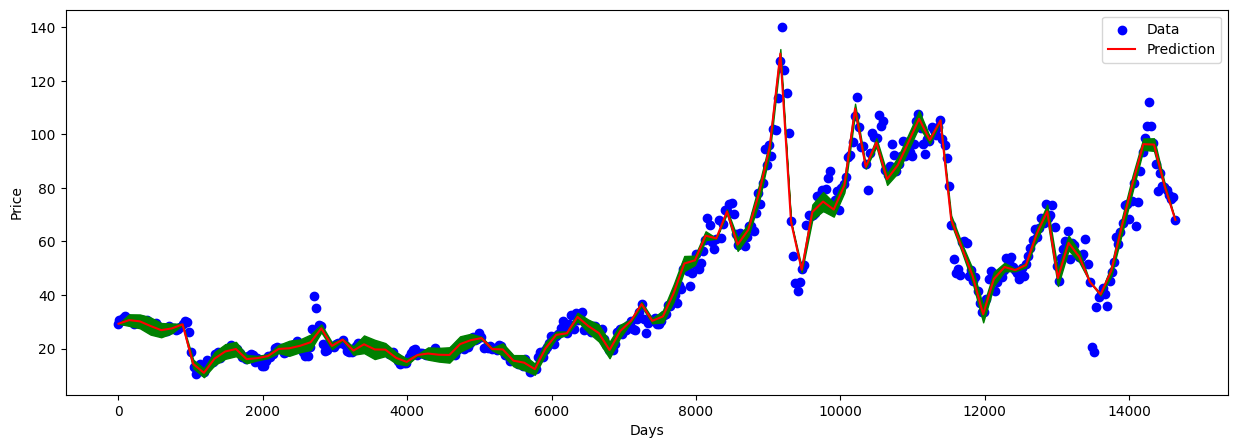

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(15, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(x_test, y_pred, c='red', label='Prediction')
plt.fill_between(x_test.ravel(), y_pred - 10*sigma, y_pred + 10*sigma, color='green')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
